## Random variables
When the objective is to predict the category (qualitative, such as predicting political party affiliation), we term the it as predicting a **`qualitative random variable`**. On the other hand, if we are predicting a quantitative value (number of cars sold), we term it a **`quantitative random variable`**.

When the observations of a `quantitative random variable` can assume values in a continuous interval (such as predicting temperature), it is called a **`continuous random variable`**.

### Properties of discrete random variable
Say, we are predicting the probability of getting heads in two coin tosses P(y). Then 

 - probability of y ranges from 0 and 1
 - sum of probabilities of all values of y = 1
 - probabilities of outcomes of discrete random variable is additive. Thus probability of y = 1 or 2 is P(1) + P(2)
 
### Binomial and Poisson discrete random variables
A **binomial** experiment is one in which the outcome is one of two possible outcomes. Coin tosses, accept / reject, pass / fail, infected / uninfected, these are the kinds of studies that involve a binomial experiment. Thus an experiment is of binomial in nature if
 - experiment has `n` identical trials
 - each trial results in 1 of 2 outcomes ( success and failure )
 - probability of one of the outcome, say success remains the same for all trials
 - trials are independent of each other
 - the random variable `y` is the number of successes observed in `n` trials.

The probability of observing `y` success in `n` trials of a binomial experiment is
$$
P(y) = \frac{n!}{y!(n-y)!}\pi^y (1-\pi)^{n-y}
$$

where 
 - n = number of trials
 - $\pi$ = probability of success in a single trial
 - $1-\pi$ = probability of failure in a single tiral
 - `y` = number of successes in `n` trials
 - $n!$ (n factorial) = $n(n-1)(n-2)..(n-(n-1))$

We can build a simple Python function to calculate the binomial probability as shown below:

In [1]:
import math

def bin_prob(n,y,pi):
    a = math.factorial(n)/(math.factorial(y)*math.factorial(n-y))
    b = math.pow(pi, y) * math.pow((1-pi), (n-y))
    p_y = a*b
    return p_y

### Binomial probability of germination
Let us consider a problem where 100 seeds are drawn at random. The germination rate of each seed is `85%`. Or in other words, the probability that a seed will germinate is `0.85`, derived from experiment that `85` out of `100` seeds would germinate in a nursery. Now we want to calculate what is the probability
 - that utmost only 80 seeds will germinate
 - that utmost only 50 seeds will germinate
 - that utmost only 10 seeds will germinate
 - that utmost only 95 seeds will germinate

In [5]:
utmost_80 = bin_prob(100,80,0.85)
print("utmost 80: " + str(utmost_80))

utmost_50 = bin_prob(100,50,0.85)
print("utmost 50: " + str(utmost_50))

utmost_10 = bin_prob(100,10,0.85)
print("utmost 10: " + str(utmost_10))

utmost_95 = bin_prob(100, 95, 0.85)
print("utmost 95: " + str(utmost_95))

utmost 80: 0.04022449066141771
utmost 50: 1.9026685879668748e-16
utmost 10: 2.4027434608795305e-62
utmost 95: 0.0011271383580980794


We could calculate the probability for all possible values of the discrete random varibale in a loop and plot the probabilities as shown below:

In [20]:
x =[]
y =[]
cum_prob = []
for i in range(1,101):
    x.append(i)
    p_y = bin_prob(100,i,0.85)
#     print(str(i) + "  " + str(p_y))
    y.append(p_y)
    
    if i==1:
        cum_prob.append(p_y)
    else:
        cum_prob.append(cum_prob[i-2] + p_y)

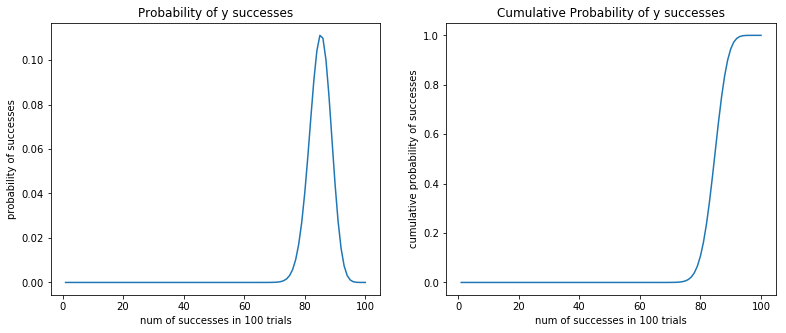

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(x,y)
ax[0].set_title('Probability of y successes')
ax[0].set_xlabel('num of successes in 100 trials')
ax[0].set_ylabel('probability of successes')

ax[1].plot(x,cum_prob)
ax[1].set_title('Cumulative Probability of y successes')
ax[1].set_xlabel('num of successes in 100 trials')
ax[1].set_ylabel('cumulative probability of successes')


As we can see in the graph above, the probability that `x` number of seeds will germinate peaks around `85`, matching the germination rate of `0.85`.

In [24]:
#find x corresponding to the max probability value
y.index(max(y)) + 1

85

The probability falls steeply before and after 85. Using the `cumulative probability`, we can answer the question of `atleast`. Find the probability that
 - atleast 20 seeds will germinate = prob(that 21 + 22 + 23 ... 100) will germinate

In [30]:
atleast_20 = cum_prob[99] - cum_prob[19]
print("atleast 20 = " + str(atleast_20))

atleast_85 = cum_prob[99] - cum_prob[84]
print("atleast 85 = " + str(atleast_85))

atleast_95 = cum_prob[99] - cum_prob[94]
print("atleast 95 = " + str(atleast_95))

atleast 20 = 1.0
atleast 85 = 0.45722420577595013
atleast 95 = 0.00042551381703914704


We can repeat the experiment with a sample size of `20` and plot the results

In [31]:
x =[]
y =[]
cum_prob = []
for i in range(1,21):
    x.append(i)
    p_y = bin_prob(20,i,0.85)
#     print(str(i) + "  " + str(p_y))
    y.append(p_y)
    
    if i==1:
        cum_prob.append(p_y)
    else:
        cum_prob.append(cum_prob[i-2] + p_y)

In [32]:
#find x corresponding to the max probability value
y.index(max(y)) + 1

17

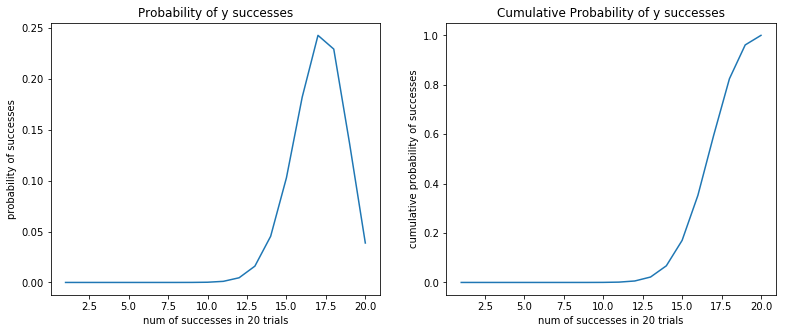

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(x,y)
ax[0].set_title('Probability of y successes')
ax[0].set_xlabel('num of successes in 20 trials')
ax[0].set_ylabel('probability of successes')

ax[1].plot(x,cum_prob)
ax[1].set_title('Cumulative Probability of y successes')
ax[1].set_xlabel('num of successes in 20 trials')
ax[1].set_ylabel('cumulative probability of successes')
